In [1]:
import pandas as pd

## Đọc file csv, join 2 dataframe

In [2]:
job_skills = pd.read_csv('./job_skills.csv')
linkedin_job_posting = pd.read_csv('./linkedin_job_postings.csv')
linkedin_job_posting = pd.merge(linkedin_job_posting, job_skills, on='job_link', how = 'inner')

In [3]:
print(linkedin_job_posting.shape)
print(linkedin_job_posting.columns)

(1296381, 15)
Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type', 'job_skills'],
      dtype='object')


In [4]:
print(job_skills.shape)
print(job_skills.columns)

(1296381, 2)
Index(['job_link', 'job_skills'], dtype='object')


In [5]:
linkedin_job_posting.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste..."
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma..."
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat..."
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,"Nursing, BSN, Medical License, Virtual RN, Nur..."


## Chuẩn hóa dữ liệu

In [6]:
print(linkedin_job_posting.isna().sum())
linkedin_job_posting = linkedin_job_posting.dropna()
print(linkedin_job_posting.isna().sum())
print(linkedin_job_posting.shape)

job_link                  0
last_processed_time       0
got_summary               0
got_ner                   0
is_being_worked           0
job_title                 0
company                   9
job_location             19
first_seen                0
search_city               0
search_country            0
search_position           0
job_level                 0
job_type                  0
job_skills             2085
dtype: int64
job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             0
dtype: int64
(1294268, 15)


In [7]:
linkedin_job_posting = linkedin_job_posting.map(lambda s:s.lower() if type(s) == str else s)
linkedin_job_posting = linkedin_job_posting.replace({' & ': ' and '}, regex=True)

In [8]:
def itr_skills(row):
    
    skills = row['job_skills'].split(', ')
    skills = [skills for skills in skills if len(skills) >= 3]
    
    return skills

linkedin_job_posting['skills'] = linkedin_job_posting.apply(itr_skills, axis=1)

In [9]:
linkedin_job_posting.drop(['job_skills'], axis=1, inplace=True)
linkedin_job_posting = linkedin_job_posting.rename(columns={'skills': 'job_skills'})

In [10]:
linkedin_job_posting.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,account executive - dispensing (norcal/norther...,bd,"san diego, ca",2024-01-15,coronado,united states,color maker,mid senior,onsite,"[medical equipment sales, key competitors, ter..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,registered nurse - rn care manager,trinity health mi,"norton shores, mi",2024-01-14,grand haven,united states,director nursing service,mid senior,onsite,"[nursing, bachelor of science in nursing, mast..."
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,restaurant supervisor - the forklift,wasatch adaptive sports,"sandy, ut",2024-01-14,tooele,united states,stand-in,mid senior,onsite,"[restaurant operations management, inventory m..."
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,independent real estate agent,howard hanna | rand realty,"englewood cliffs, nj",2024-01-16,pinehurst,united states,real-estate clerk,mid senior,onsite,"[real estate, customer service, sales, negotia..."
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,registered nurse (rn),trinity health mi,"muskegon, mi",2024-01-14,muskegon,united states,nurse practitioner,mid senior,onsite,"[nursing, bsn, medical license, virtual rn, nu..."


## Xu hướng thời điểm đăng tin tuyển dụng 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

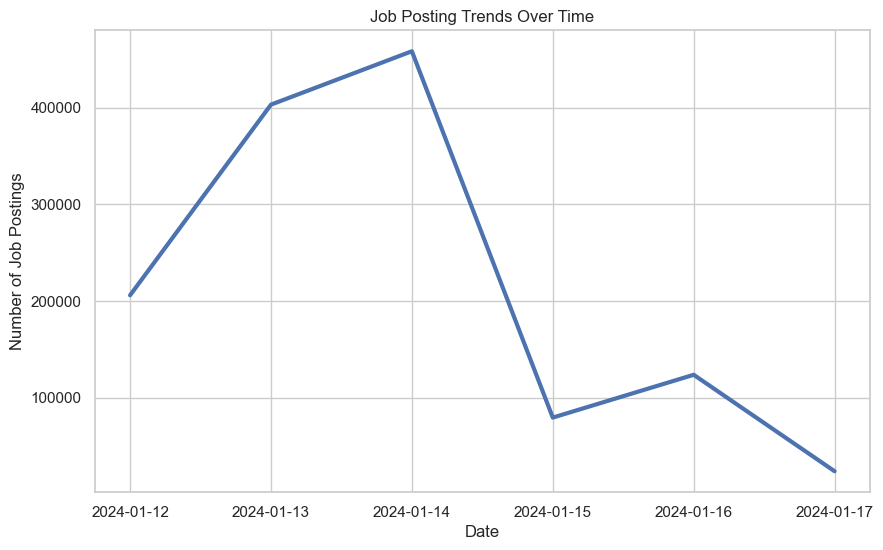

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
linkedin_job_posting['first_seen'].value_counts().sort_index().plot(kind='line', linewidth=3)
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

## Top Skills theo từng công việc

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
df = linkedin_job_posting

grouped_skills = df.groupby('job_title')['job_skills'].sum()

grouped_skills.head()

job_title
"a" softball coach - central middle school                [softball coaching, coaching experience, under...
"accountant"                                              [attention to detail, journal entries, account...
"attorney" (gov appt/non-merit) jobs                      [law, state and federal laws rules and regulat...
"b" baseball coach - central middle school                [baseball coaching, coaching experience, under...
"full time" sales assistant, westboro location, ottawa    [sales, merchandising, marketing, baking, cust...
Name: job_skills, dtype: object

In [15]:
most_common_skills = grouped_skills.apply(lambda x: Counter(x).most_common(5))

In [30]:
common_skills_df = most_common_skills.reset_index()
common_skills_df.head()

,job_title,job_skills
0,"""a"" softball coach - central middle school","[(softball coaching, 1), (coaching experience,..."
1,"""accountant""","[(accounting, 2), (attention to detail, 1), (j..."
2,"""attorney"" (gov appt/non-merit) jobs","[(law, 1), (state and federal laws rules and r..."
3,"""b"" baseball coach - central middle school","[(baseball coaching, 1), (coaching experience,..."
4,"""full time"" sales assistant, westboro location...","[(sales, 1), (merchandising, 1), (marketing, 1..."


In [52]:
test = common_skills_df[common_skills_df['job_title'] == 'store manager']
skills_data = test['job_skills'].tolist()

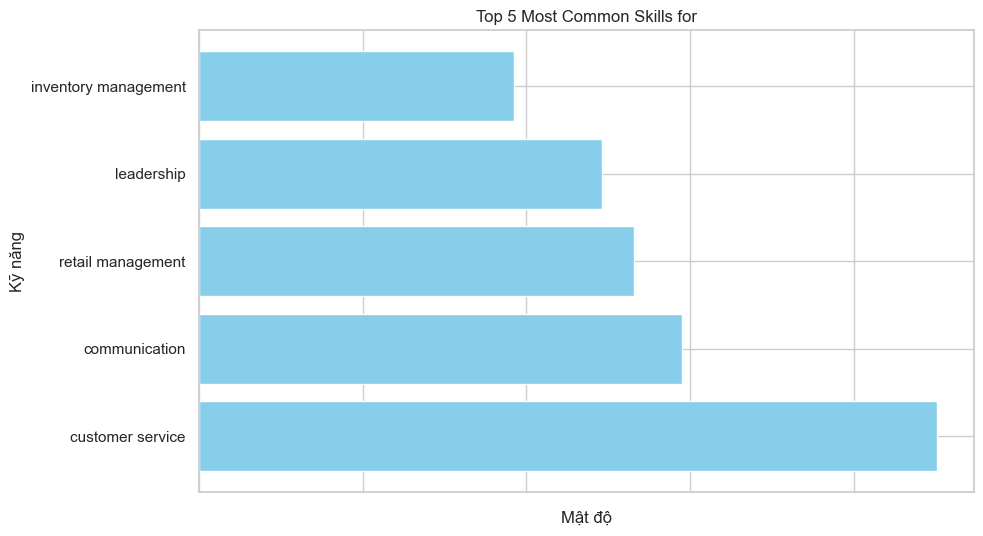

In [53]:
skills, counts = zip(*skills_data[0])
plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color='skyblue')
plt.ylabel('Kỹ năng')
plt.xlabel('Mật độ')
plt.title(f'Top 5 Most Common Skills for')
ax = plt.gca()
ax.set_xticklabels([])
plt.show()